In [ ]:
!wget https://www.dropbox.com/s/qv3fwuzp18p4s3s/OralCancer.rar

--2023-01-28 04:06:40--  https://www.dropbox.com/s/qv3fwuzp18p4s3s/OralCancer.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qv3fwuzp18p4s3s/OralCancer.rar [following]
--2023-01-28 04:06:41--  https://www.dropbox.com/s/raw/qv3fwuzp18p4s3s/OralCancer.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a176545c411bb89018dc0ea00.dl.dropboxusercontent.com/cd/0/inline/B1YjYBE4KdiTxG8U38R4eBhXdJvWUQFTgbFt0rh9hu9jAVyi-Ag-K_pi-ypxGBY3mghvTtd8ADMlhkzGdY9jJZt0LPUQLEz7UZSJ1PlLpWyy03ZrAoLuFLq92bVsP6AjA_4D6BDuVgnj7NqgSWd9Cfb18hxN-9wiKAy83kXACASuRQ/file# [following]
--2023-01-28 04:06:41--  https://uc7a176545c411bb89018dc0ea00.dl.dropboxusercontent.com/cd/0/inline/B1YjYBE4KdiTxG8U38R4eBhXdJvWUQFTgbFt0rh9hu9jAVyi-Ag-K_pi-ypxGBY3mghvTtd

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 10.1 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/OralCancer.rar")

patool: Extracting /content/OralCancer.rar ...
patool: running /usr/bin/unrar x -- /content/OralCancer.rar
patool:     with cwd='./Unpack_w8owhiwc'
patool: ... /content/OralCancer.rar extracted to `Oral Cancer'.


'Oral Cancer'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# Count number of images in respective classes
ROOT_DIR = "/content/Oral Cancer"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

image_count=number_of_images.items()

In [ ]:
def datafolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./"+p+"/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) ,
                                size =(math.floor(split*number_of_images[dir])-5),
                                replace=False ):
      O = os.path.join(ROOT_DIR,dir,img)  #path
      D = os.path.join("./"+p,dir)
      shutil.copy(O,D)
      os.remove(O)

  else :
    print(f"{p}Folder exists")


In [ ]:
datafolder("train",0.7)

trainFolder exists


In [ ]:
datafolder("val",0.25)

valFolder exists


In [ ]:
datafolder("test",0.05)

testFolder exists


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_set='/content/train'
val_set='/content/val'
test_set='/content/test'

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')

Found 6990 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'oral_normal': 0, 'oral_scc': 1}

In [ ]:
base_for_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in base_for_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_for_model)
model.add(GaussianNoise(0.25)) #to prevent overfitting
model.add(GlobalAveragePooling2D()) #to converge and reduce the parameters
model.add(Dense(512, activation = 'relu')) #hidden layer (relu activation function is suggested for images)
model.add(BatchNormalization()) #to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 512)        0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                        

In [ ]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
mp= tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.hdf5',
                               verbose=1, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
callback=[es,mp]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=80,
    epochs = 20,
    validation_data = validation_generator,
    callbacks=callback
)

Epoch 1/20
80/80 [==============================] - ETA: 0s - loss: 0.7832 - accuracy: 0.6438 - precision: 0.6495 - recall: 0.6293 - auc: 0.6773
Epoch 1: val_loss improved from inf to 0.74470, saving model to mymodel.hdf5
80/80 [==============================] - 61s 609ms/step - loss: 0.7832 - accuracy: 0.6438 - precision: 0.6495 - recall: 0.6293 - auc: 0.6773 - val_loss: 0.7447 - val_accuracy: 0.6871 - val_precision: 0.6643 - val_recall: 0.7566 - val_auc: 0.7581
Epoch 2/20
80/80 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.7219 - precision: 0.7245 - recall: 0.7245 - auc: 0.7913
Epoch 2: val_loss improved from 0.74470 to 0.62268, saving model to mymodel.hdf5
80/80 [==============================] - 48s 599ms/step - loss: 0.5858 - accuracy: 0.7219 - precision: 0.7245 - recall: 0.7245 - auc: 0.7913 - val_loss: 0.6227 - val_accuracy: 0.7181 - val_precision: 0.7246 - val_recall: 0.7036 - val_auc: 0.7928
Epoch 3/20
80/80 [==============================] - ETA: 0s 

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc=(history.history['accuracy'])
loss=(history.history['loss'])
prc=(history.history['precision'])
rec=(history.history['recall'])
auc=(history.history['auc'])
val_acc=(history.history['val_accuracy'])
val_loss=(history.history['val_loss'])
val_prc=(history.history['val_precision'])
val_rec=(history.history['val_recall'])
val_auc=(history.history['val_auc'])

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


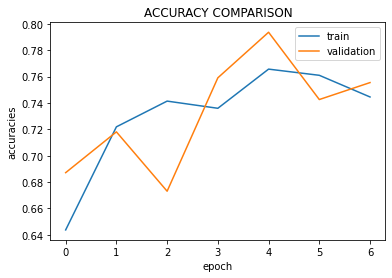

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])

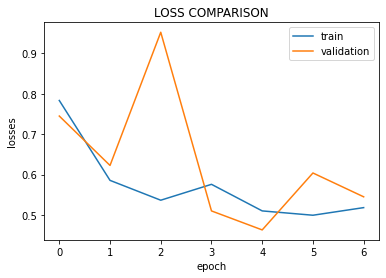

In [ ]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

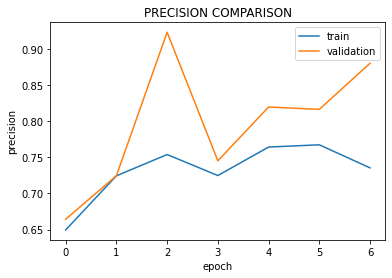

In [ ]:
plt.title('PRECISION COMPARISON')
plt.plot(prc)
plt.plot(val_prc)
plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(['train','validation'])

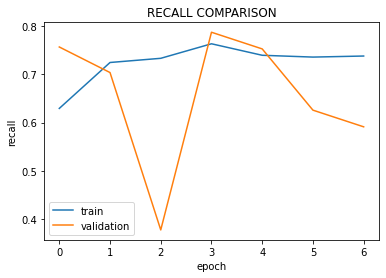

In [ ]:
plt.title('RECALL COMPARISON')
plt.plot(rec)
plt.plot(val_rec)
plt.xlabel('epoch')
plt.ylabel('recall')
plt.legend(['train','validation'])

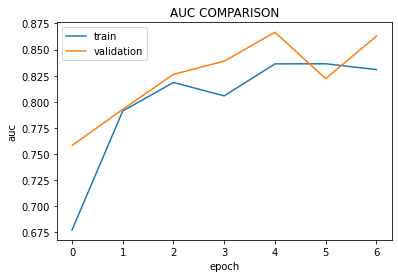

In [ ]:
plt.title('AUC COMPARISON')
plt.plot(auc)
plt.plot(val_auc)
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train','validation'])

In [ ]:
model.evaluate(train_generator)

874/874 [==============================] - 107s 123ms/step - loss: 0.5276 - accuracy: 0.7552 - precision: 0.8899 - recall: 0.5825 - auc: 0.8735


[0.5276127457618713,
 0.7552217245101929,
 0.8898601531982422,
 0.5825464725494385,
 0.8735233545303345]

In [ ]:
model.evaluate(validation_generator)

312/312 [==============================] - 38s 121ms/step - loss: 0.5593 - accuracy: 0.7498 - precision: 0.8868 - recall: 0.5727 - auc: 0.8586


[0.5592629909515381,
 0.7497991919517517,
 0.8868159055709839,
 0.5726907849311829,
 0.8585951924324036]

In [ ]:
model.evaluate(test_generator)

62/62 [==============================] - 8s 120ms/step - loss: 0.5131 - accuracy: 0.7531 - precision: 0.9026 - recall: 0.5673 - auc: 0.8840


[0.5130636692047119,
 0.7530612349510193,
 0.9025974273681641,
 0.5673469305038452,
 0.8840150237083435]

62/62 [==============================] - 7s 117ms/step


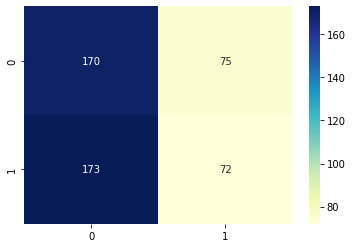

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_generator)
test_generator.classes
cm = confusion_matrix(test_generator.classes, predictions.round())

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       245
           1       0.49      0.29      0.37       245

    accuracy                           0.49       490
   macro avg       0.49      0.49      0.47       490
weighted avg       0.49      0.49      0.47       490



In [ ]:
from keras_preprocessing.image import load_img, img_to_array

1/1 [==============================] - 0s 15ms/step


'Normal'

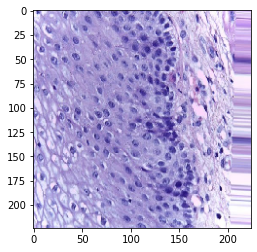

In [ ]:
path ="/content/Oral Cancer/oral_normal/oral_normal_3006.jpg"
img = load_img(path,target_size=(224,224))
imaga = img_to_array(img)
image = np.expand_dims(imaga,axis=0)
ypred = model.predict(image)
if ypred<0.5:
      ypred="Normal"
else:
      ypred="Squamous Cell Carcinoma"
plt.imshow(img)
ypred

In [ ]:
path ="/content/Oral Cancer/oral_normal/oral_normal_4743.jpg"
img = load_img(path,target_size=(224,224))
imaga = img_to_array(img)
image = np.expand_dims(imaga,axis=0)
ypred = model.predict(image)
if ypred<0.5:
      ypred="Normal"
else:
      ypred="Squamous Cell Carcinoma"
plt.imshow(img)
ypred